# Density

In [136]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
from scipy.constants import mu_0
from scipy.constants import elementary_charge as q_e
from scipy.constants import proton_mass as m_i
from astropy.convolution import convolve, convolve_fft
from scipy.signal import fftconvolve
from scipy.interpolate import SmoothBivariateSpline
import write_canonical_flux_tube_quantities as wcf
reload(wcf)

from datetime import date
from datetime import datetime
import visit_writer

import structured_3d_vtk as struc_3d
reload(struc_3d)

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

import os

import ion_current_to_mach_number as ic_to_mach
reload(ic_to_mach)

import read_from_sql

from mpl_toolkits.mplot3d import Axes3D

In [137]:
now = datetime.now().strftime("%Y-%m-%d-%H-%M")
out_dir = '../output/' + now
try:
    os.makedirs(out_dir)
except:
    pass

In [138]:
n_all_planes = wcf.save_idl_quantity_to_unstructured_grids('n', 'n', now,
                                                           x_min=-0.026, x_max=0.028,
                                                           y_min=-0.03, y_max=0.028, 
                                                           z_min=0.249, z_max=0.416,
                                                           bounds=(1e3, 1e22))


n_triangulation, n_interpolators = wcf.give_delaunay_and_interpolator(n_all_planes)
n_three_planes = wcf.remove_plane(0.302, n_all_planes)
n_three_triangulation, n_three_interpolators = wcf.give_delaunay_and_interpolator(n_three_planes)

## Examine density in measurement planes

In [139]:
(x_min, x_max, 
 y_min, y_max,
 z_min, z_max) = wcf.joint_mach_bdot_tp_extent()
spatial_increment = 0.001
mesh = np.meshgrid(np.linspace(x_min, x_max, np.ceil((x_max-x_min)/spatial_increment)),
                   np.linspace(y_min, y_max, np.ceil((y_max-y_min)/spatial_increment)),
                   np.linspace(z_min, z_max, np.ceil((z_max-z_min)/spatial_increment)))

# Timestep 0

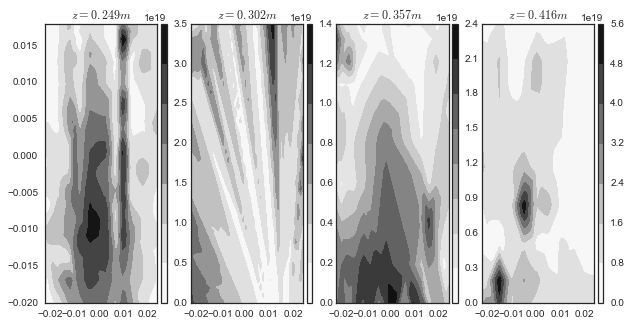

In [145]:
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], mesh, n_interpolators[0], 
                            figsize=(10,5))

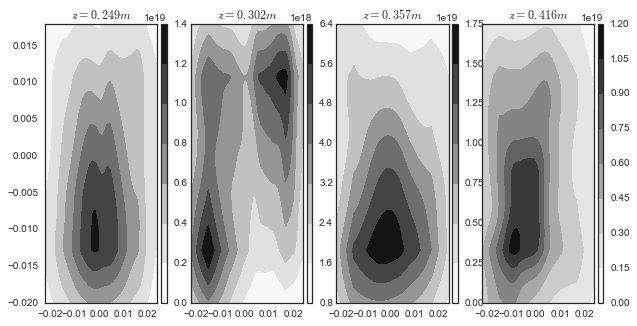

In [150]:
interpolated_n = wcf.scalar_on_mesh(n_interpolators[0], 
                                                mesh)
filtered_n = wcf.boxcar_filter_quantity_mesh(interpolated_n,
                                                         15)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_n, 
                            interpolator=False,
                            figsize=(10,5))

# Timestep 50

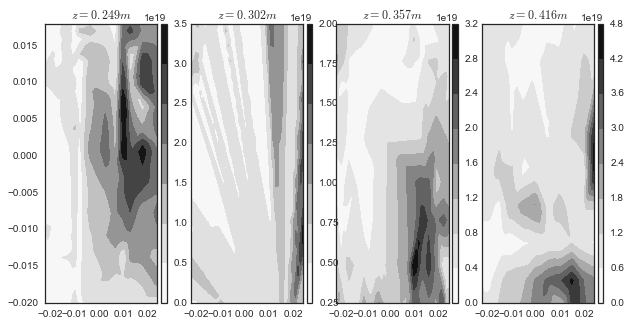

In [146]:
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], mesh, n_interpolators[50], 
                            figsize=(10,5))

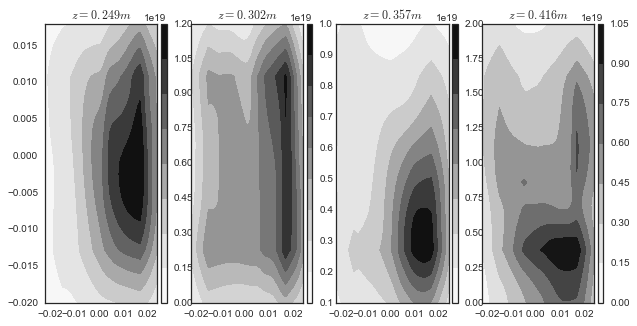

In [153]:
interpolated_n = wcf.scalar_on_mesh(n_interpolators[50], 
                                                mesh)
filtered_n = wcf.boxcar_filter_quantity_mesh(interpolated_n,
                                                         15)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_n, 
                            interpolator=False,
                            figsize=(10,5))

# Timestep 100

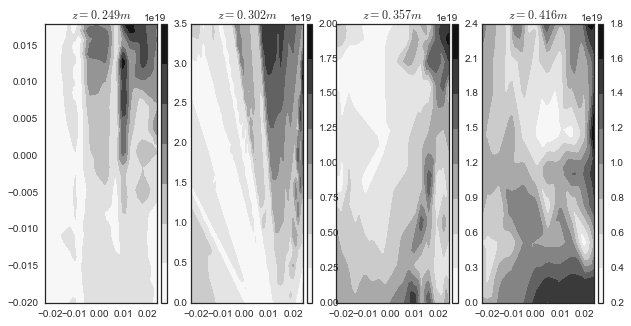

In [147]:
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], mesh, n_interpolators[100], 
                            figsize=(10,5))

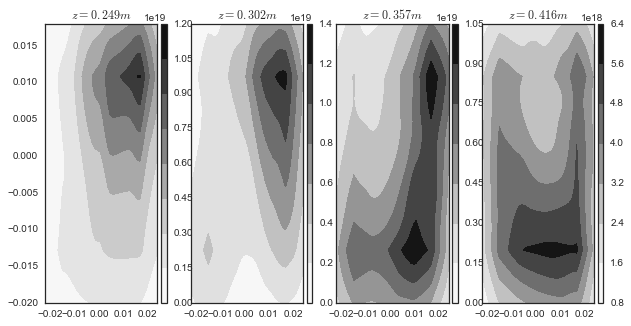

In [154]:
interpolated_n = wcf.scalar_on_mesh(n_interpolators[100], 
                                                mesh)
filtered_n = wcf.boxcar_filter_quantity_mesh(interpolated_n,
                                                         15)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_n, 
                            interpolator=False,
                            figsize=(10,5))

# Timestep 200

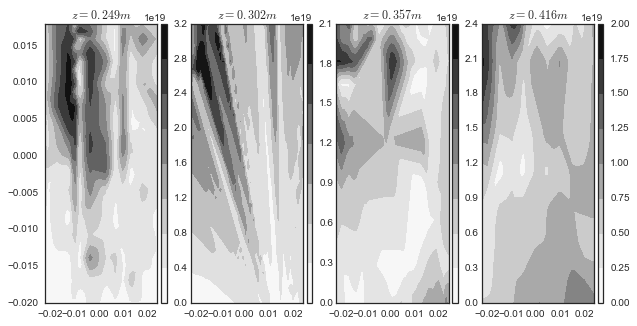

In [155]:
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], mesh, n_interpolators[200], 
                            figsize=(10,5))

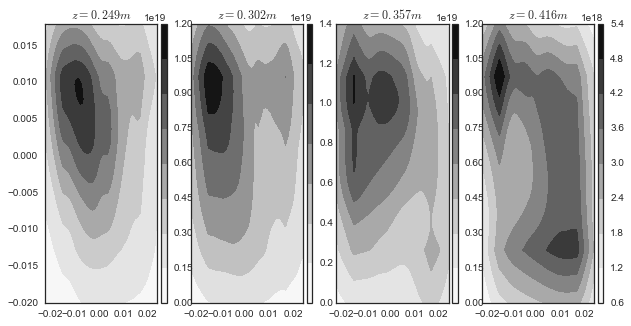

In [156]:
interpolated_n = wcf.scalar_on_mesh(n_interpolators[200], 
                                                mesh)
filtered_n = wcf.boxcar_filter_quantity_mesh(interpolated_n,
                                                         15)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_n, 
                            interpolator=False,
                            figsize=(10,5))

# Drop z=0.302 data 

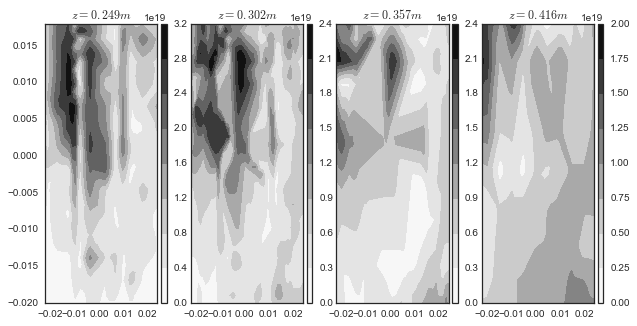

In [159]:
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], mesh, n_three_interpolators[200],
                            figsize=(10,5))

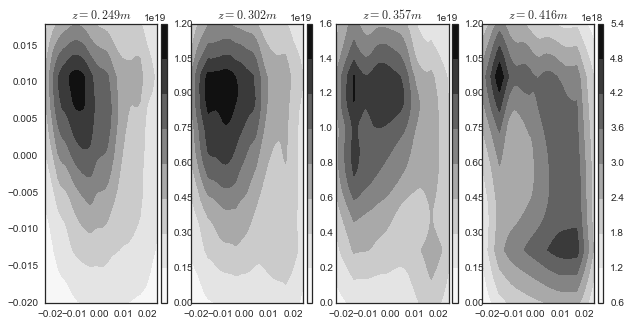

In [158]:
interpolated_three_plane_n = wcf.scalar_on_mesh(n_three_interpolators[200], 
                                                mesh)
filtered_three_plane_n = wcf.boxcar_filter_quantity_mesh(interpolated_three_plane_n,
                                                         15)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_three_plane_n, 
                            interpolator=False,
                            figsize=(10,5))

## Filter density with boxcar filter, vary boxcar witdth

### boxcar width = 5

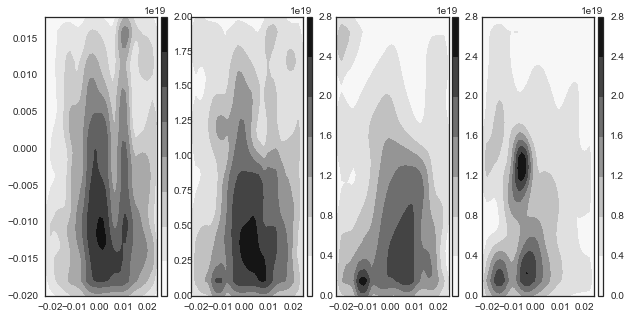

In [104]:
interpolated_three_plane_n = wcf.scalar_on_mesh(n_three_interpolators[9], 
                                                mesh)
filtered_three_plane_n = wcf.boxcar_filter_quantity_mesh(interpolated_three_plane_n,
                                                         5)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_three_plane_n, 
                            interpolator=False,
                            figsize=(10,5))

### boxcar width = 10

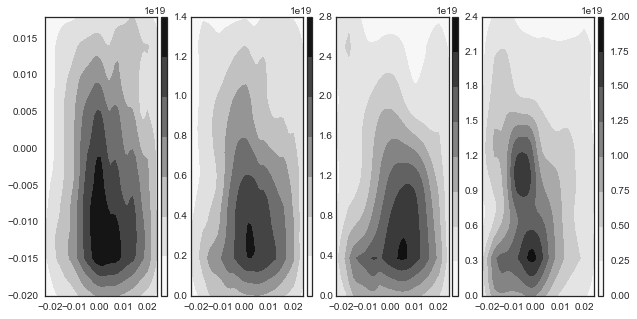

In [105]:
interpolated_three_plane_n = wcf.scalar_on_mesh(n_three_interpolators[9], 
                                                mesh)
filtered_three_plane_n = wcf.boxcar_filter_quantity_mesh(interpolated_three_plane_n,
                                                         10)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_three_plane_n, 
                            interpolator=False,
                            figsize=(10,5))

### boxcar width = 15

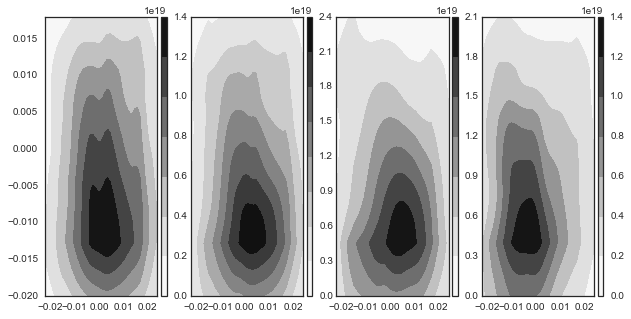

In [106]:
interpolated_three_plane_n = wcf.scalar_on_mesh(n_three_interpolators[9], 
                                                mesh)
filtered_three_plane_n = wcf.boxcar_filter_quantity_mesh(interpolated_three_plane_n,
                                                         15)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_three_plane_n, 
                            interpolator=False,
                            figsize=(10,5))

#  Temperature

In [160]:
te_all_planes = wcf.save_idl_quantity_to_unstructured_grids('te', 'T_e', now, 
                                                            x_min=-0.026, x_max=0.028,
                                                            y_min=-0.03, y_max=0.028, 
                                                            z_min=0.249, z_max=0.416,
                                                            bounds=(1e-3, 1e3))

te_triangulation, te_interpolators = wcf.give_delaunay_and_interpolator(te_all_planes)

# time point 0

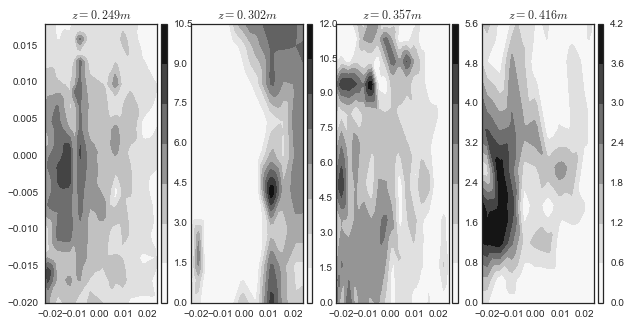

In [164]:
interpolated_te = wcf.scalar_on_mesh(te_interpolators[0], 
                                                mesh)

fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            interpolated_te, interpolator=False,
                            figsize=(10,5))

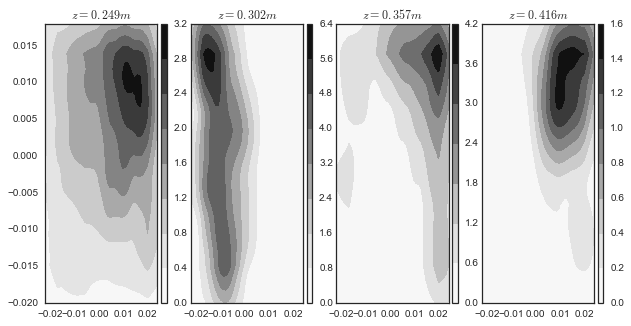

In [167]:
interpolated_te = wcf.scalar_on_mesh(te_interpolators[100], 
                                                mesh)

filtered_te = wcf.boxcar_filter_quantity_mesh(interpolated_te,
                                                         10)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_te, interpolator=False,
                            figsize=(10,5))

# time point 100

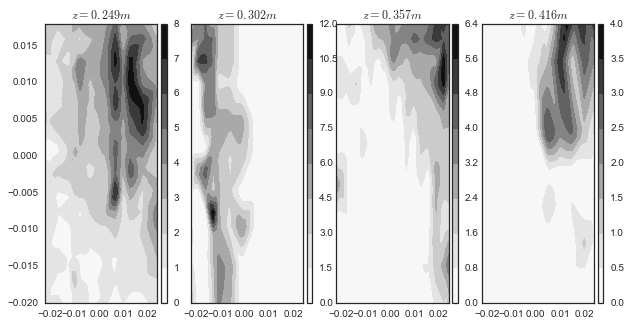

In [165]:
interpolated_te = wcf.scalar_on_mesh(te_interpolators[100], 
                                                mesh)

fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            interpolated_te, interpolator=False,
                            figsize=(10,5))

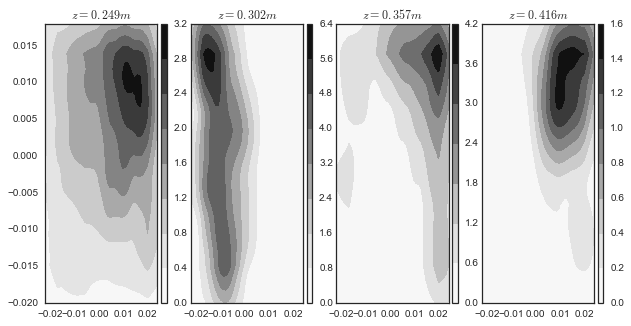

In [166]:
interpolated_te = wcf.scalar_on_mesh(te_interpolators[100], 
                                                mesh)

filtered_te = wcf.boxcar_filter_quantity_mesh(interpolated_te,
                                                         10)
fig, axes = wcf.plot_planes([0.249, 0.302, 0.357, 0.416], 
                            mesh, 
                            filtered_te, interpolator=False,
                            figsize=(10,5))

# Current

In [173]:
bx_all_planes = wcf.save_idl_quantity_to_unstructured_grids('bx', 'B_x', now,
                                                            *[-0.032, 0.028, -0.022, 0.032, 0.249, 0.416])
by_all_planes = wcf.save_idl_quantity_to_unstructured_grids('by', 'B_y', now,
                                                            *[-0.032, 0.028, -0.022, 0.032, 0.249, 0.416])
bz_all_planes = wcf.save_idl_quantity_to_unstructured_grids('bz', 'B_z', now,
                                                            *[-0.026, 0.028, -0.03, 0.028, 0.249, 0.416])

bx_triangulation, bx_interpolators = wcf.give_delaunay_and_interpolator(bx_all_planes)
by_triangulation, by_interpolators = wcf.give_delaunay_and_interpolator(by_all_planes)
bz_triangulation, bz_interpolators = wcf.give_delaunay_and_interpolator(bz_all_planes)

bx_interpolator = bx_interpolators[0]
by_interpolator = by_interpolators[0]
bz_interpolator = bz_interpolators[0]
        
bx_derivative = wcf.triangulate_derivatives(mesh, bx_triangulation, bx_interpolator,
                                        increment=0.001)
bx_derivative = wcf.remove_edges_derivative_meshes(bx_derivative)
by_derivative = wcf.triangulate_derivatives(mesh, by_triangulation, by_interpolator,
                                        increment=0.001)
by_derivative = wcf.remove_edges_derivative_meshes(by_derivative)
bz_derivative = wcf.triangulate_derivatives(mesh, bz_triangulation, bz_interpolator,
                                        increment=0.001)
bz_derivative = wcf.remove_edges_derivative_meshes(bz_derivative)


current = wcf.current_on_mesh([bx_derivative,
                               by_derivative,
                               bz_derivative])
        
current = np.asarray(current)

current_filtered = np.array(current)

for direction in xrange(len(current)):
    current_filtered[direction] = wcf.boxcar_filter_quantity_mesh(current[direction], 15)

In [178]:
mesh_wo_edges = wcf.remove_edges_mesh([np.array(mesh[0]),
                                   np.array(mesh[1]),
                                   np.array(mesh[2])])

(<matplotlib.figure.Figure at 0x134ace8d0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x14cce0e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14ddc31d0>], dtype=object))

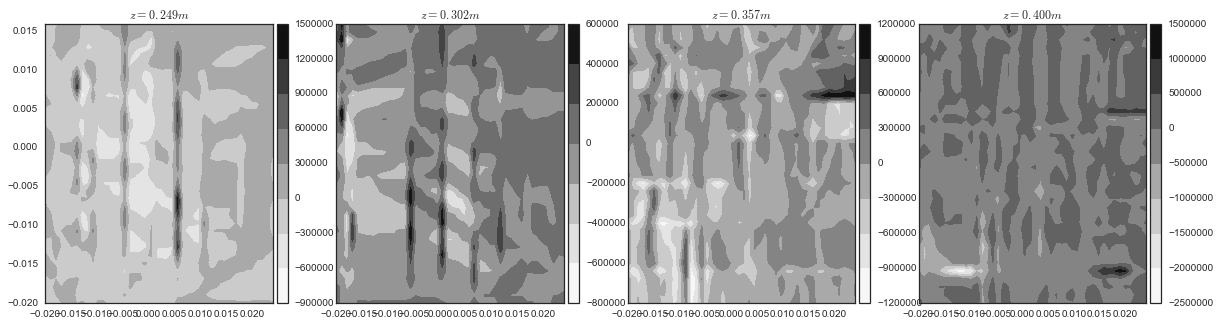

In [189]:
wcf.plot_planes([0.249, 0.302, 0.357, 0.4], 
                mesh_wo_edges, 
                current[2], interpolator=False,
                figsize=(20,5))

TypeError: Input z must be a 2D array.

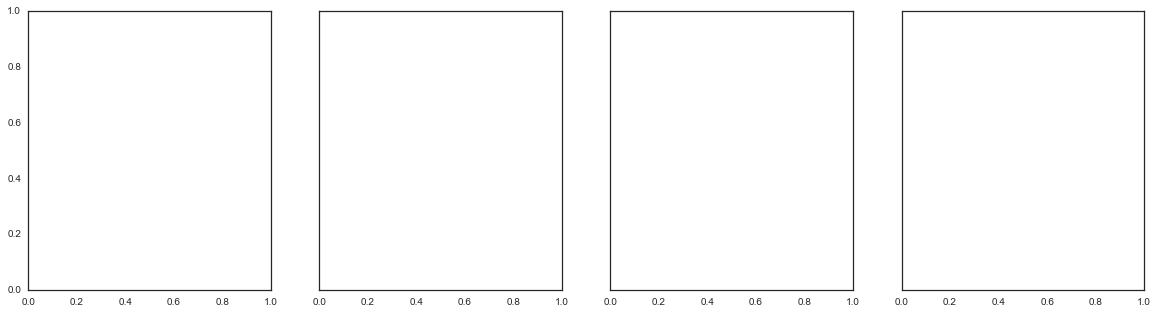

In [200]:
current_mag = np.sqrt(current[2]**2 + current**2+ current**2)
wcf.plot_planes([0.249, 0.302, 0.357, 0.4], 
                mesh_wo_edges, 
                current_mag, interpolator=False,
                figsize=(20,5))

(<matplotlib.figure.Figure at 0x13417fad0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x14fabe090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15c194690>], dtype=object))

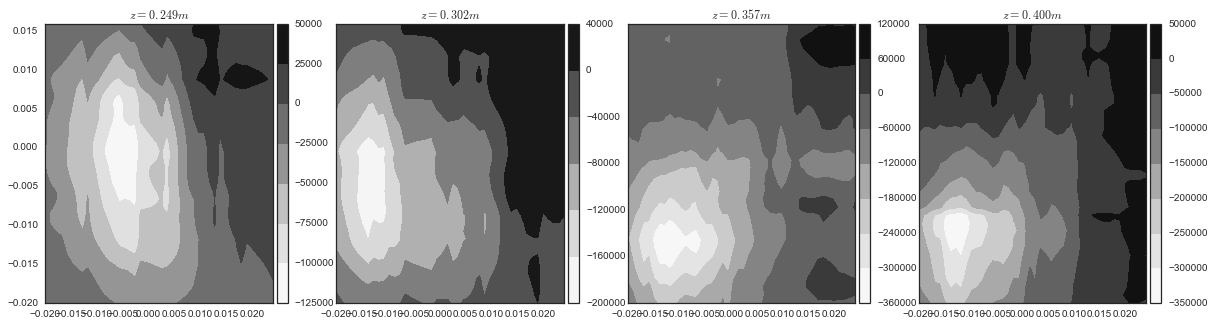

In [190]:
wcf.plot_planes([0.249, 0.302, 0.357, 0.4], 
                mesh_wo_edges, 
                current_filtered[2], interpolator=False,
                figsize=(20,5))

(<matplotlib.figure.Figure at 0x15b8b5d90>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x15fb6b990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15b6d8f10>], dtype=object))

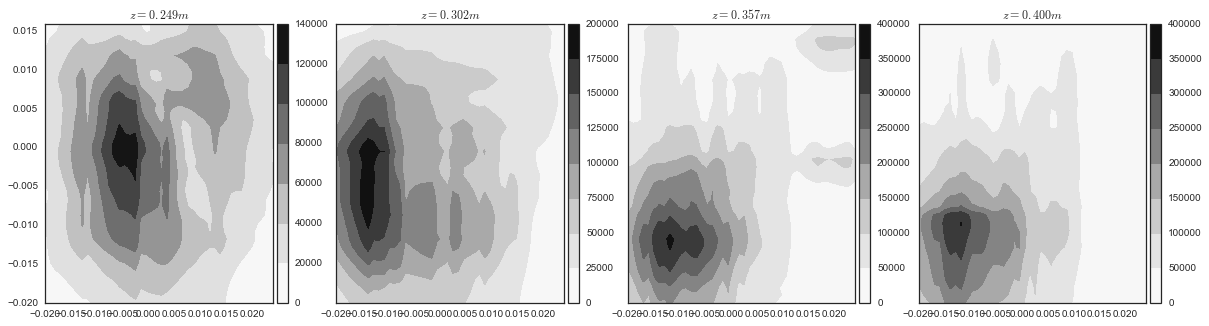

In [196]:
current_mag = np.sqrt(current_filtered[2]**2 + current_filtered[1]**2+ current_filtered[0]**2)
wcf.plot_planes([0.249, 0.302, 0.357, 0.4], 
                mesh_wo_edges, 
                current_mag, interpolator=False,
                figsize=(20,5))

In [185]:
bx_all_planes = wcf.save_idl_quantity_to_unstructured_grids('bx', 'B_x', now,
                                                            *[-0.032, 0.028, -0.022, 0.032, 0.249, 0.416])
by_all_planes = wcf.save_idl_quantity_to_unstructured_grids('by', 'B_y', now,
                                                            *[-0.032, 0.028, -0.022, 0.032, 0.249, 0.416])
bz_all_planes = wcf.save_idl_quantity_to_unstructured_grids('bz', 'B_z', now,
                                                            *[-0.026, 0.028, -0.03, 0.028, 0.249, 0.416])

bx_triangulation, bx_interpolators = wcf.give_delaunay_and_interpolator(bx_all_planes)
by_triangulation, by_interpolators = wcf.give_delaunay_and_interpolator(by_all_planes)
bz_triangulation, bz_interpolators = wcf.give_delaunay_and_interpolator(bz_all_planes)

bx_interpolator = bx_interpolators[0]
by_interpolator = by_interpolators[0]
bz_interpolator = bz_interpolators[0]
        
bx_derivative = wcf.triangulate_derivatives(mesh, bx_triangulation, bx_interpolator,
                                        increment=0.001)
bx_derivative = wcf.remove_edges_derivative_meshes(bx_derivative)
by_derivative = wcf.triangulate_derivatives(mesh, by_triangulation, by_interpolator,
                                        increment=0.001)
by_derivative = wcf.remove_edges_derivative_meshes(by_derivative)
bz_derivative = wcf.triangulate_derivatives(mesh, bz_triangulation, bz_interpolator,
                                        increment=0.001)
bz_derivative = wcf.remove_edges_derivative_meshes(bz_derivative)


current = wcf.current_on_mesh([bx_derivative,
                               by_derivative,
                               bz_derivative])
        
current = np.asarray(current)

current_filtered_20 = np.array(current)

for direction in xrange(len(current)):
    current_filtered_20[direction] = wcf.boxcar_filter_quantity_mesh(current[direction], 20)

(<matplotlib.figure.Figure at 0x15b8b5990>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x15b8df9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15bc47750>], dtype=object))

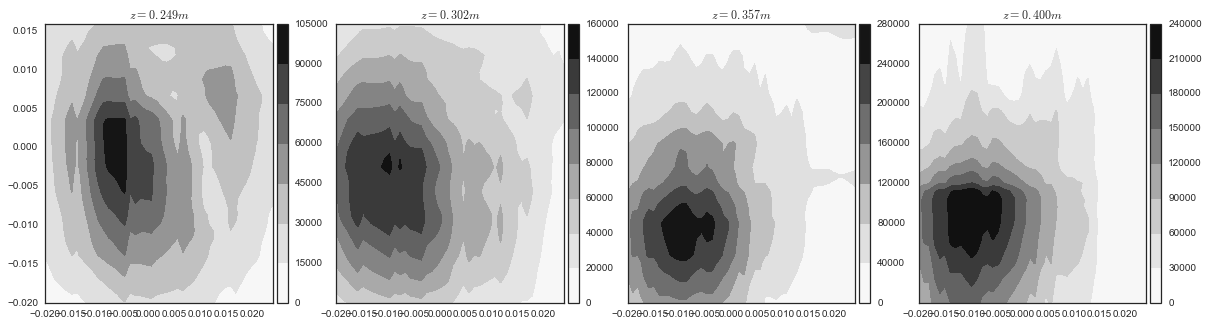

In [195]:
current_mag = np.sqrt(current_filtered_20[2]**2 + current_filtered_20[1]**2+ current_filtered_20[0]**2)
wcf.plot_planes([0.249, 0.302, 0.357, 0.4], 
                mesh_wo_edges, 
                current_mag, interpolator=False,
                figsize=(20,5))

In [199]:
bx_all_planes = wcf.save_idl_quantity_to_unstructured_grids('bx', 'B_x', now,
                                                            *[-0.032, 0.028, -0.022, 0.032, 0.249, 0.416])
by_all_planes = wcf.save_idl_quantity_to_unstructured_grids('by', 'B_y', now,
                                                            *[-0.032, 0.028, -0.022, 0.032, 0.249, 0.416])
bz_all_planes = wcf.save_idl_quantity_to_unstructured_grids('bz', 'B_z', now,
                                                            *[-0.026, 0.028, -0.03, 0.028, 0.249, 0.416])

bx_triangulation, bx_interpolators = wcf.give_delaunay_and_interpolator(bx_all_planes)
by_triangulation, by_interpolators = wcf.give_delaunay_and_interpolator(by_all_planes)
bz_triangulation, bz_interpolators = wcf.give_delaunay_and_interpolator(bz_all_planes)

bx_interpolator = bx_interpolators[0]
by_interpolator = by_interpolators[0]
bz_interpolator = bz_interpolators[0]
        
bx_derivative = wcf.triangulate_derivatives(mesh, bx_triangulation, bx_interpolator,
                                        increment=0.001)
bx_derivative = wcf.remove_edges_derivative_meshes(bx_derivative)
by_derivative = wcf.triangulate_derivatives(mesh, by_triangulation, by_interpolator,
                                        increment=0.001)
by_derivative = wcf.remove_edges_derivative_meshes(by_derivative)
bz_derivative = wcf.triangulate_derivatives(mesh, bz_triangulation, bz_interpolator,
                                        increment=0.001)
bz_derivative = wcf.remove_edges_derivative_meshes(bz_derivative)


current = wcf.current_on_mesh([bx_derivative,
                               by_derivative,
                               bz_derivative])
        
current = np.asarray(current)

current_filtered_30 = np.array(current)

for direction in xrange(len(current)):
    current_filtered_30[direction] = wcf.boxcar_filter_quantity_mesh(current[direction], 30)